# LC-MS analysis of m6A levels in fpa-8 mutants and 35S::FPA overexpressors

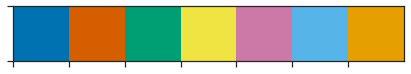

In [1]:
import sys
import os
import re
from glob import glob
import random
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=1.2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7', '#56b4e9', '#e69f00'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [6]:
lcms_data = pd.read_csv('data/LCMS_m6A.csv', sep=',')
lcms_data['ratio'] = lcms_data['m6a'] / lcms_data['A']
lcms_data.head()

,genotype,m6a,A,ratio
0,Col-0,0.051704,4.425659,0.011683
1,Col-0,0.021586,2.293149,0.009413
2,Col-0,0.031023,2.903776,0.010684
3,Col-0,0.026879,2.674497,0.010050
4,vir-1,0.003184,2.512245,0.001267


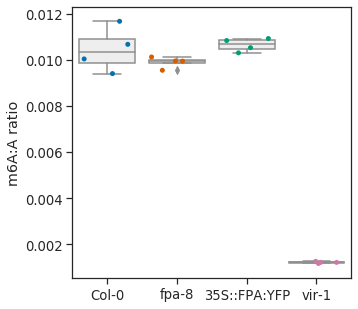

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(x='genotype', y='ratio',
            order=['Col-0', 'fpa-8', '35S::FPA:YFP', 'vir-1'],
            color='#eeeeee',
            data=lcms_data)

sns.stripplot(x='genotype', y='ratio',
              order=['Col-0', 'fpa-8', '35S::FPA:YFP', 'vir-1'],
              data=lcms_data, jitter=0.4,
              palette=[pal[0], pal[1], pal[2], pal[4]])
ax.set_xlabel('')
ax.set_ylabel('m6A:A ratio')
plt.savefig('figures/m6a_A_ratio.svg')
plt.show()

In [30]:
flacc = [
    'Col-0', 'Col-0', 'Col-0', 'Col-0',
    'vir-1', 'vir-1', 'vir-1', 'vir-1',
    'flacc-1', 'flacc-1', 'flacc-1', 'flacc-1',
]
flacc_res = [0.007274009, 0.008633628, 0.008254319, 0.008558344,
             0.000857854, 0.000921575, 0.000947094, 8.96763e-05,
             0.00960193, 0.010145082, 0.009676993, 0.009587339]

flacc_res = pd.DataFrame(list(zip(flacc, flacc_res)), columns=['genotype', 'ratio'])
flacc_res.head()

,genotype,ratio
0,Col-0,0.007274
1,Col-0,0.008634
2,Col-0,0.008254
3,Col-0,0.008558
4,vir-1,0.000858


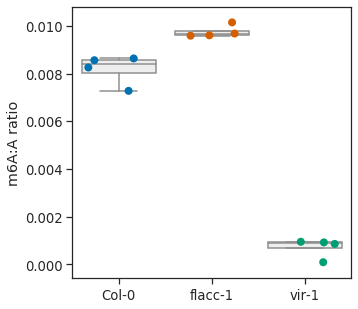

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(x='genotype', y='ratio',
            order=['Col-0', 'flacc-1', 'vir-1'],
            color='#eeeeee',
            data=flacc_res,
            showfliers=False)

sns.stripplot(x='genotype', y='ratio',
              order=['Col-0', 'flacc-1', 'vir-1'],
              data=flacc_res, jitter=0.4, size=8,
              palette=[pal[0], pal[1], pal[2]])
ax.set_xlabel('')
ax.set_ylabel('m6A:A ratio')
plt.show()